In [1]:
from sklearn.datasets import make_classification
import numpy as np

In [18]:
X,y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,n_classes=2, n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=20)

In [19]:
import matplotlib.pyplot as plt

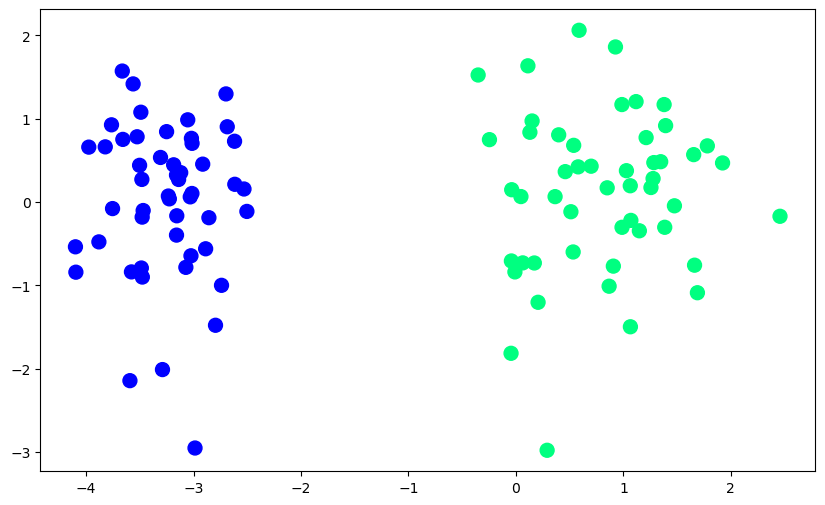

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [21]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [22]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
    
    return weights[0],weights[1:]

In [23]:
intercept_,coef_ = perceptron(X,y)
intercept_, coef_

(2.8458564413498104, array([ 2.83749803, -0.07618408]))

In [41]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [42]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

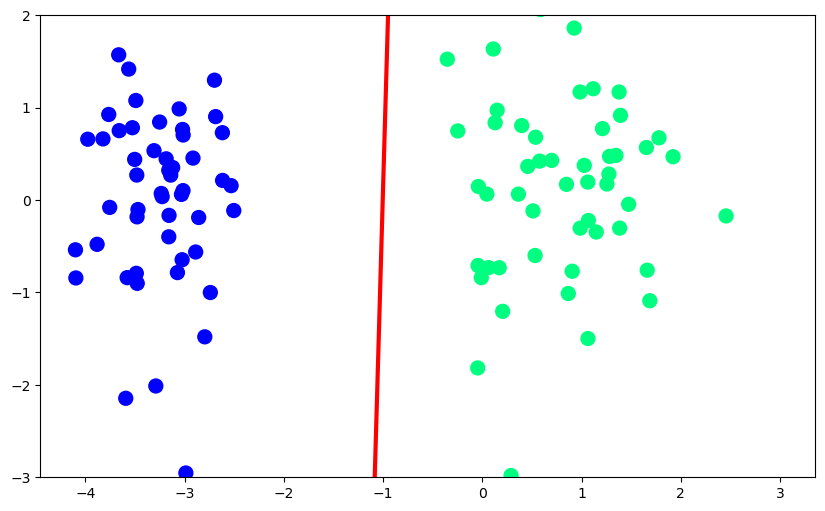

In [43]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [44]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty='none',solver='sag')
lor.fit(X,y)

/Users/khayam/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/khayam/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [45]:
print(lor.coef_)
print(lor.intercept_)

[[4.85040471 0.22252985]]
[5.81662567]


In [46]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [47]:
x_input_1 = np.linspace(-3,3,100)
y_input_1 = m1*x_input + b1

(-3.0, 2.0)

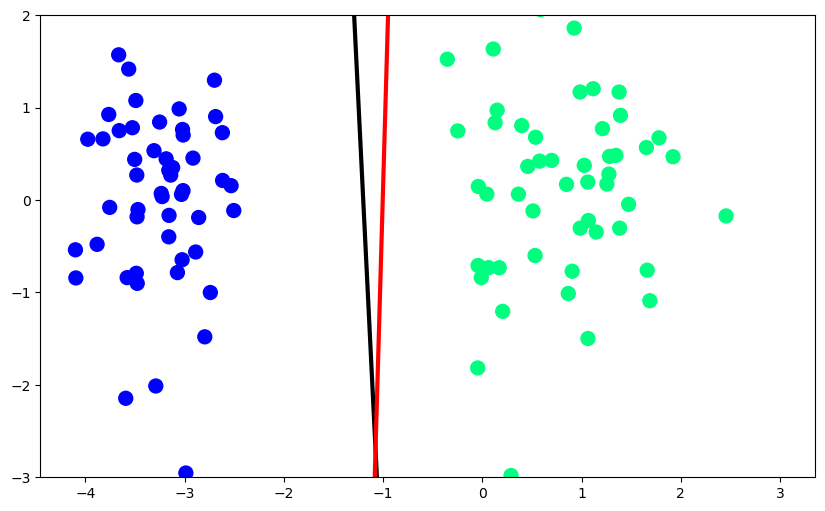

In [48]:
plt.figure(figsize=(10,6))
plt.plot(x_input_1,y_input_1,color='black',linewidth=3)
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [51]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [97]:
def gd(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(3000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y - y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]

In [98]:
coef_,intercept_ = gd(X,y)

In [99]:
m2 = -(coef_[0]/coef_[1])
b2 = -(intercept_/coef_[1])

In [100]:
x_input_2 = np.linspace(-3,3,100)
y_input_2 = m2*x_input + b2

(-3.0, 2.0)

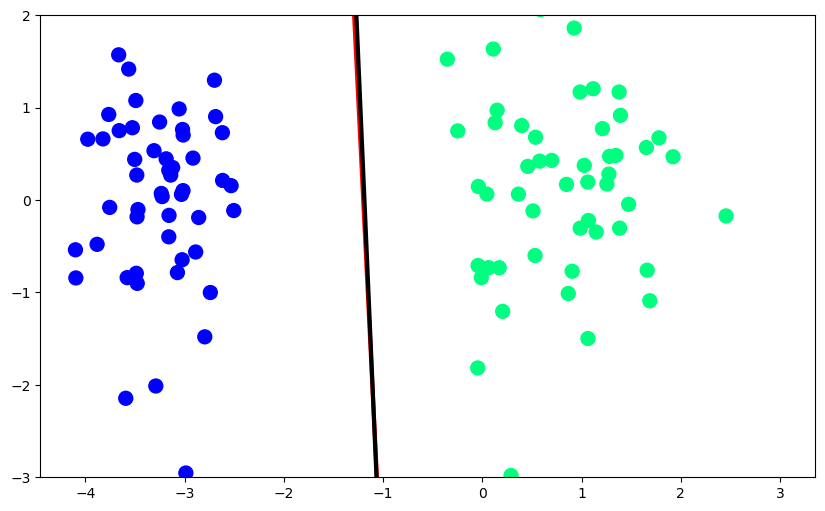

In [101]:
plt.figure(figsize=(10,6))
plt.plot(x_input_1,y_input_1,color='red',linewidth=3)
plt.plot(x_input_2,y_input_2,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)